In [1]:
import os
os.getcwd()

'C:\\Users\\lu15159\\FinancialModelingLocal\\python-prototyping-zkt\\python\\jupyter-notebooks'

In [2]:
cd ..\trading-strategy-env

C:\Users\lu15159\FinancialModelingLocal\python-prototyping-zkt\python\trading-strategy-env


In [3]:
from smiportfoliosimulation import *
import matplotlib.pyplot as plt
import pandas as pd

# Historical Simulation of Single BRC Universe

## Define Underlying Universe and get Historical Markets

In [4]:
universe_underlying_names = ["SMI", "NESN", "NOVN", "ROG", "UBSG", "ZURN", "CSGN"]

In [5]:
markets = construct_markets_from_data(universe_underlying_names)

## Define Barrier Option

In [6]:
is_put = True
relative_strike = 1.0
relative_barrier = 0.8
tenor = 1.0

## Simulate Historically

In [7]:
dip_df_dict = historically_simulate_dip_portfolio(markets, universe_underlying_names, is_put,
                                             relative_strike, relative_barrier, tenor)

In [8]:
dip_df_dict[universe_underlying_names[0]]

,adjustedExpiryDate,spot,div,rate,atmVol,wingVol,pricingVol,optionPv,optionPv%,performance,isBarrierHit,effectivePerformance,pnl
inceptionDate,,,,,,,,,,,,,
2010-02-26,2011-02-25,6710.99,0.038263,0.006164,0.170908,0.224538,0.188785,448.617243,0.066848,-0.025896,False,0.0,0.067260
2010-03-05,2011-03-04,6847.78,0.037844,0.006139,0.165841,0.227592,0.186425,446.821239,0.065251,-0.046327,False,0.0,0.065651
2010-03-12,2011-03-11,6836.60,0.037860,0.006380,0.170804,0.216126,0.185912,443.159264,0.064822,-0.070626,False,0.0,0.065235
2010-03-19,2011-03-18,6880.76,0.037680,0.006347,0.164658,0.222489,0.183935,437.345128,0.063561,-0.113753,False,0.0,0.063964
2010-03-26,2011-03-25,6838.95,0.038001,0.006380,0.166910,0.237039,0.190286,461.685458,0.067508,-0.071162,False,0.0,0.067939
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,2021-11-19,10495.65,0.031743,-0.006133,0.151666,0.217768,0.173700,640.436185,0.061019,0.195258,False,0.0,0.060647
2020-11-27,2021-11-26,10501.18,0.031676,-0.006131,0.147499,0.214464,0.169820,614.283798,0.058497,0.161699,False,0.0,0.058140
2020-12-04,2021-12-03,10364.50,0.031888,-0.006135,0.149838,0.216640,0.172105,622.585447,0.060069,0.174757,False,0.0,0.059703


# Benchmark SMI BRC

In [9]:
smi_underlying_names = ["SMI"]

In [10]:
smi_weights = [1.0]

## Construct SMI Statistics

In [11]:
smi_df = construct_portfolio_df(smi_underlying_names, smi_weights, dip_df_dict)

In [12]:
smi_df

,optionPv,optionPv%,performance,effectivePerformance,pnl,isBarrierHit,adjustedExpiryDate,spot,div,rate,atmVol,wingVol,pricingVol
inceptionDate,,,,,,,,,,,,,
2010-02-26,448.617243,0.066848,-0.025896,0.0,0.067260,0,2011-02-25,6710.99,0.038263,0.006164,0.170908,0.224538,0.188785
2010-03-05,446.821239,0.065251,-0.046327,0.0,0.065651,0,2011-03-04,6847.78,0.037844,0.006139,0.165841,0.227592,0.186425
2010-03-12,443.159264,0.064822,-0.070626,0.0,0.065235,0,2011-03-11,6836.60,0.037860,0.006380,0.170804,0.216126,0.185912
2010-03-19,437.345128,0.063561,-0.113753,0.0,0.063964,0,2011-03-18,6880.76,0.037680,0.006347,0.164658,0.222489,0.183935
2010-03-26,461.685458,0.067508,-0.071162,0.0,0.067939,0,2011-03-25,6838.95,0.038001,0.006380,0.166910,0.237039,0.190286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,640.436185,0.061019,0.195258,0.0,0.060647,0,2021-11-19,10495.65,0.031743,-0.006133,0.151666,0.217768,0.173700
2020-11-27,614.283798,0.058497,0.161699,0.0,0.058140,0,2021-11-26,10501.18,0.031676,-0.006131,0.147499,0.214464,0.169820
2020-12-04,622.585447,0.060069,0.174757,0.0,0.059703,0,2021-12-03,10364.50,0.031888,-0.006135,0.149838,0.216640,0.172105


<AxesSubplot:xlabel='inceptionDate'>

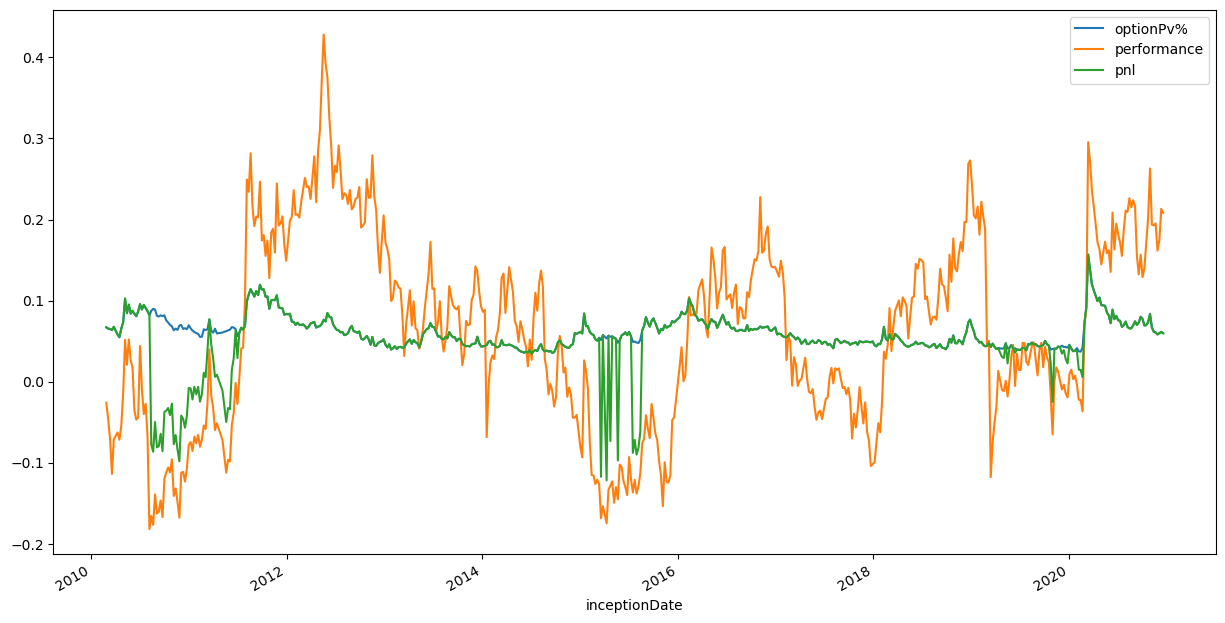

In [13]:
smi_df.plot(y=["optionPv%", "performance", "pnl"], figsize=(15,8))

<AxesSubplot:xlabel='inceptionDate'>

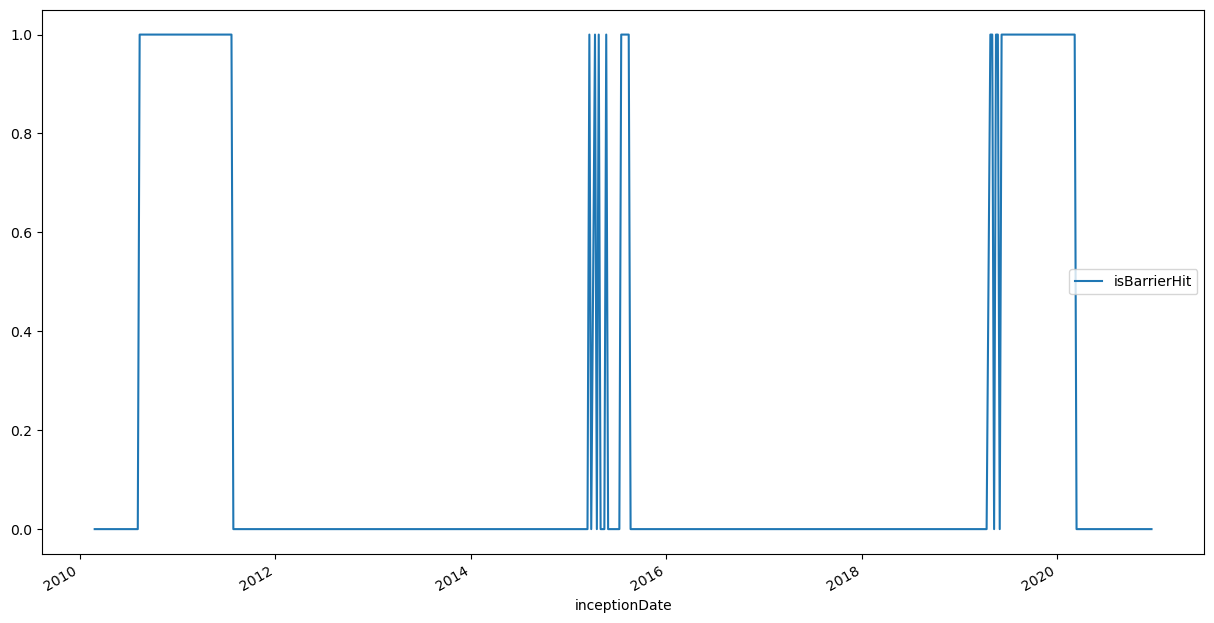

In [14]:
smi_df.plot(y=["isBarrierHit"], figsize=(15,8))

In [15]:
min_pnl, max_pnl = [smi_df["pnl"].min(), smi_df["pnl"].max()]

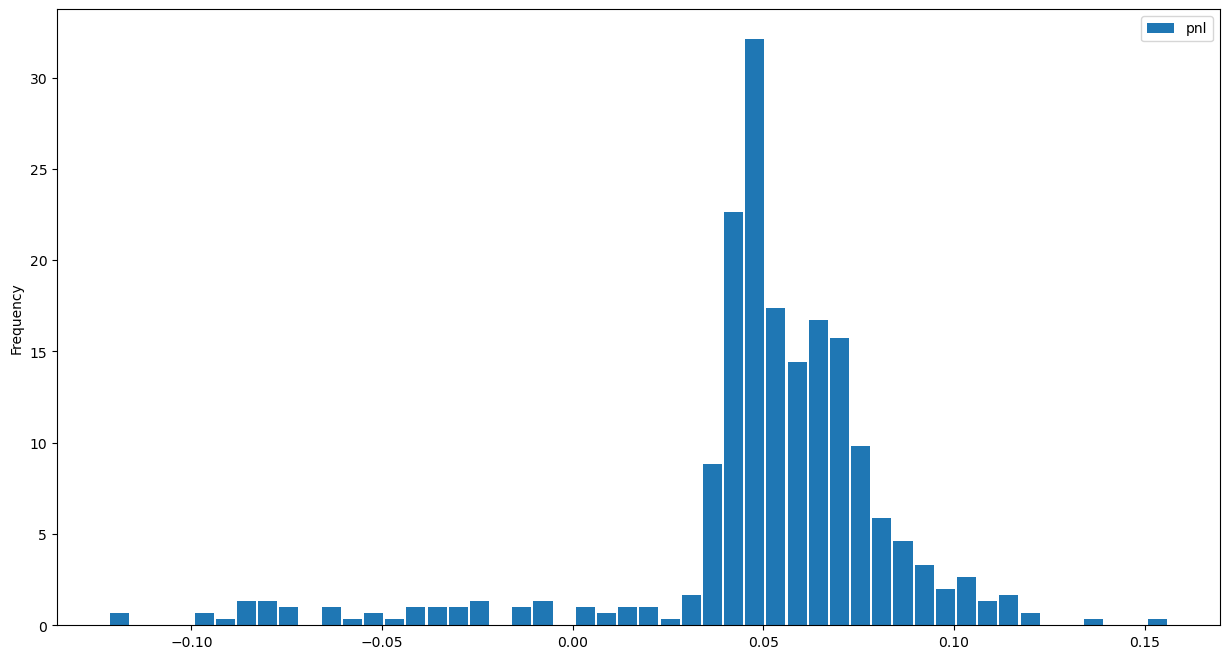

In [16]:
ax = smi_df.plot.hist(column=["pnl"], range=[min_pnl, max_pnl], bins=50, density=True, figsize=(15, 8), rwidth=0.9)

In [17]:
smi_df["pnl"].describe()

count    549.000000
mean       0.049990
std        0.036597
min       -0.121680
25%        0.043822
50%        0.052379
75%        0.067930
max        0.156094
Name: pnl, dtype: float64

In [18]:
sharpe_ratio = smi_df["pnl"].mean()/smi_df["pnl"].std()

In [19]:
print(sharpe_ratio)

1.3659728536690439


# Underlying BRC Portfolio

## Define Portfolio

In [20]:
portfolio_underlying_names = ["NESN", "NOVN", "ROG", "UBSG", "ZURN"]

In [21]:
portfolio_weights = [0.2, 0.2, 0.2, 0.2, 0.2]

## Construct Portfolio Statistics

In [22]:
portfolio_df = construct_portfolio_df(portfolio_underlying_names, portfolio_weights, dip_df_dict)

In [23]:
portfolio_df

,optionPv,optionPv%,performance,effectivePerformance,pnl,isBarrierHit,adjustedExpiryDate,spot,div,rate,atmVol,wingVol,pricingVol
inceptionDate,,,,,,,,,,,,,
2010-02-26,10.568193,0.100086,-0.025568,-0.046934,0.053769,1,2011-02-25,53.45,0.030392,0.006164,0.171767,0.218093,0.187209
2010-03-05,10.269248,0.096248,-0.054077,-0.052049,0.044791,1,2011-03-04,52.90,0.030713,0.006139,0.180592,0.214339,0.191841
2010-03-12,10.037381,0.093482,-0.078862,-0.047982,0.046097,1,2011-03-11,53.75,0.030219,0.006380,0.180348,0.206895,0.189197
2010-03-19,9.912443,0.091912,-0.124735,-0.057614,0.034882,1,2011-03-18,53.15,0.030565,0.006347,0.173591,0.199380,0.182187
2010-03-26,9.940462,0.091056,-0.079742,-0.046733,0.044904,1,2011-03-25,53.75,0.030219,0.006380,0.171469,0.201292,0.181410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-20,13.898310,0.080208,0.132489,0.000000,0.079719,0,2021-11-19,103.68,0.026387,-0.006133,0.143335,0.184357,0.157009
2020-11-27,13.797339,0.079279,0.099927,0.000000,0.078796,0,2021-11-26,102.30,0.026748,-0.006131,0.140581,0.183162,0.154775
2020-12-04,13.800895,0.081308,0.123384,0.000000,0.080812,0,2021-12-03,99.00,0.027652,-0.006135,0.147435,0.188125,0.160999


<AxesSubplot:xlabel='inceptionDate'>

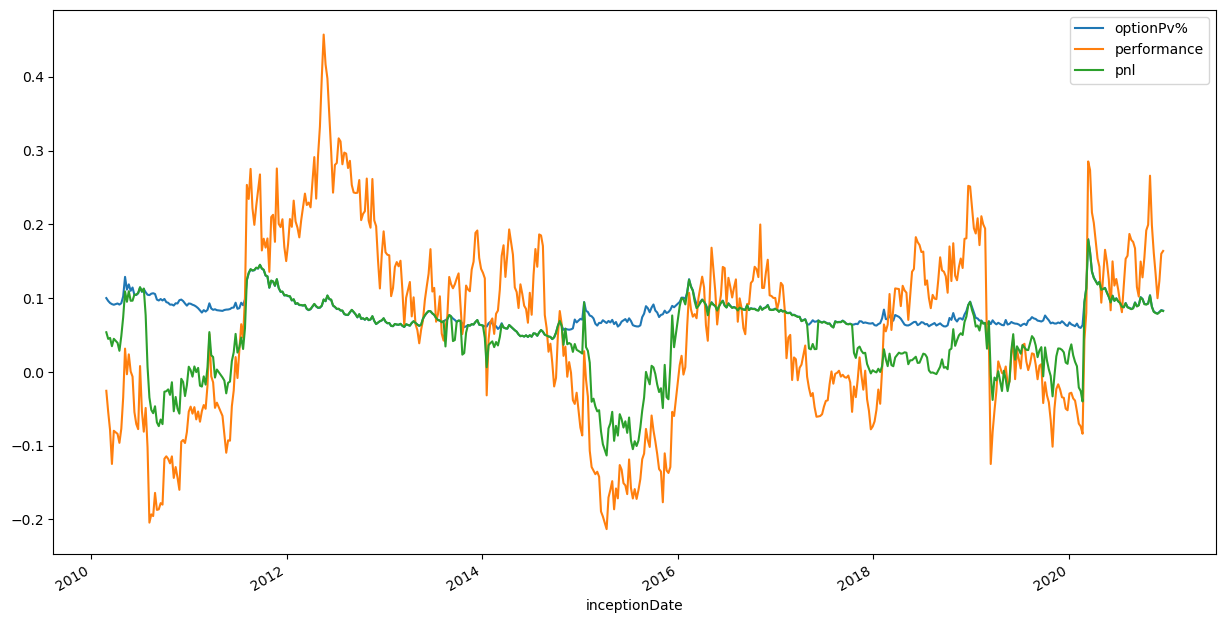

In [24]:
portfolio_df.plot(y=["optionPv%", "performance", "pnl"], figsize=(15,8))

<AxesSubplot:xlabel='inceptionDate'>

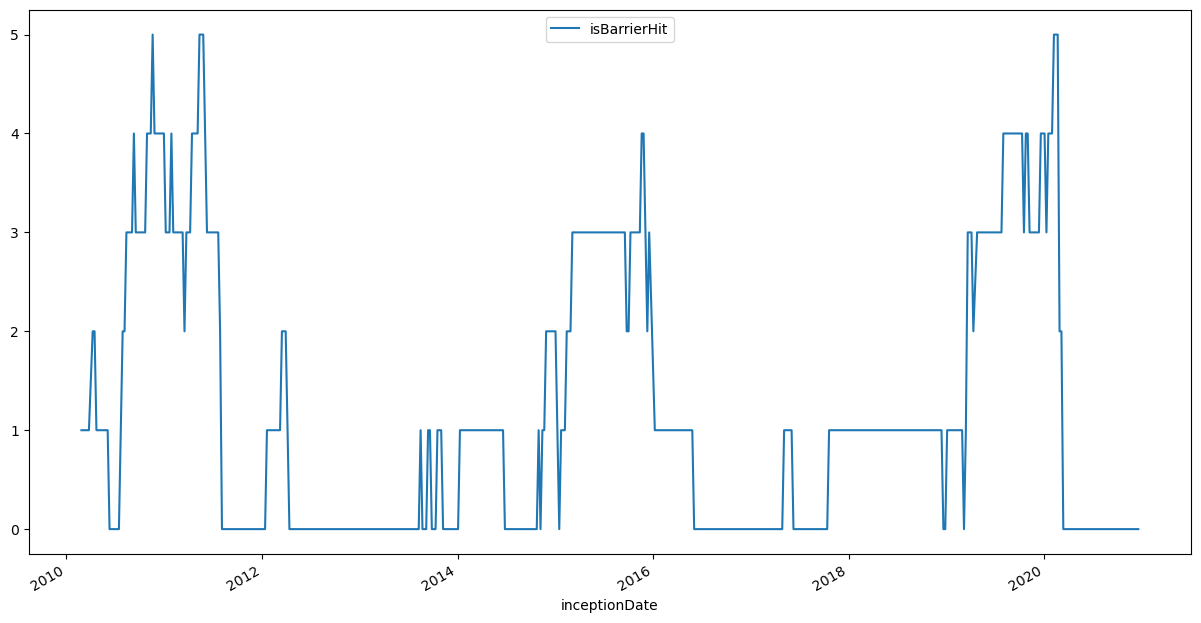

In [25]:
portfolio_df.plot(y=["isBarrierHit"], figsize=(15,8))

In [26]:
portfolio_min_pnl, portfolio_max_pnl = [portfolio_df["pnl"].min(), portfolio_df["pnl"].max()]

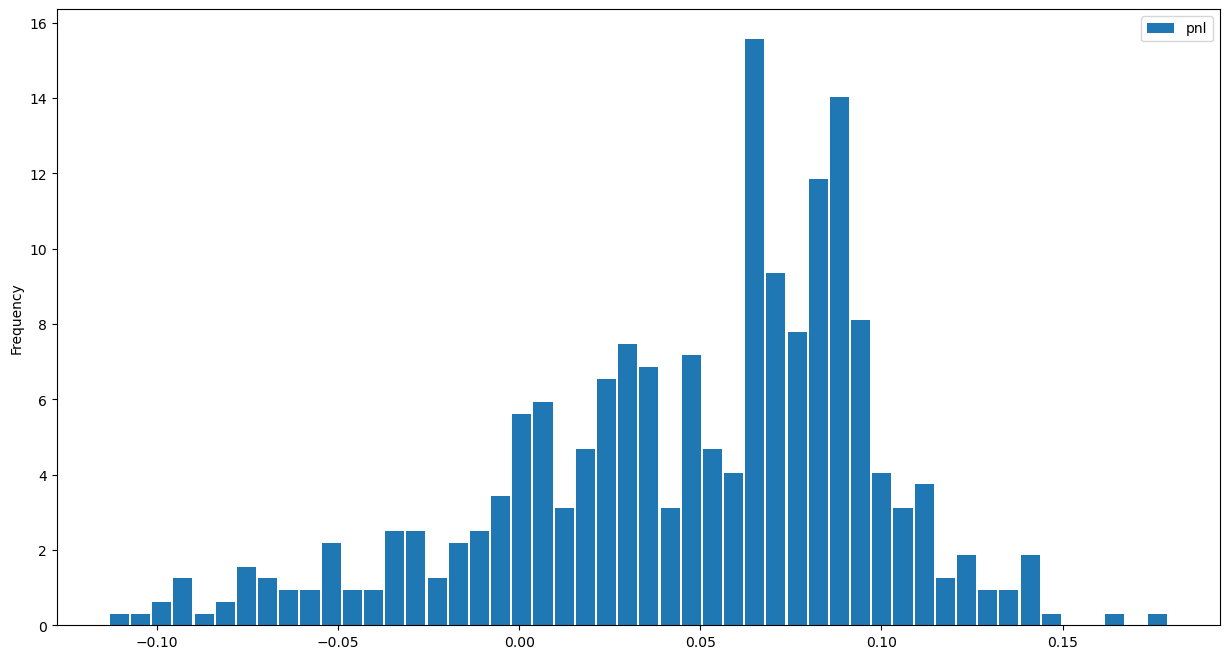

In [27]:
portfolio_ax = portfolio_df.plot.hist(column=["pnl"], range=[portfolio_min_pnl, portfolio_max_pnl], bins=50, density=True, figsize=(15, 8), rwidth=0.9)

In [28]:
portfolio_df["pnl"].describe()

count    549.000000
mean       0.047350
std        0.050628
min       -0.113253
25%        0.017321
50%        0.062011
75%        0.084393
max        0.179016
Name: pnl, dtype: float64

In [29]:
sharpe_ratio = portfolio_df["pnl"].mean()/portfolio_df["pnl"].std()

In [30]:
print(sharpe_ratio)

0.9352427668093035
